In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 256

In [2]:
from datetime import datetime
print "results as of ", datetime.now().strftime("%c")

results as of  Tue Nov  8 22:57:53 2016


In [3]:
from functools import partial
import requests
import pandas as pd

def num_votes(name, candidates):
    return sum([x['n'] for x in candidates if x['name'] == name])

def by_state(state):
    results = requests.get('http://elections.huffingtonpost.com/2016/results/state/{}.json'.format(state))
    data = results.json()

    geos = data['president']['geos']
    df = pd.DataFrame(geos)


    df['trump'] = df['candidates'].apply(partial(num_votes, 'Trump'))
    df['clinton'] = df['candidates'].apply(partial(num_votes, 'Clinton'))

    df2 = df[df['fractionReporting'] != 0.]

    result = pd.DataFrame({
        'count': df2[['trump', 'clinton']].sum(),
        'projection': df2[['trump', 'clinton']].divide(df['fractionReporting'], axis=0).sum()
    })
    
    return result / result.sum()

contested_states = ['FL', 'PA', 'MI', 'NC', 'VA', 'CO', 'OH', 'WI', 'NV']

dfs = {s: by_state(s) for s in contested_states}

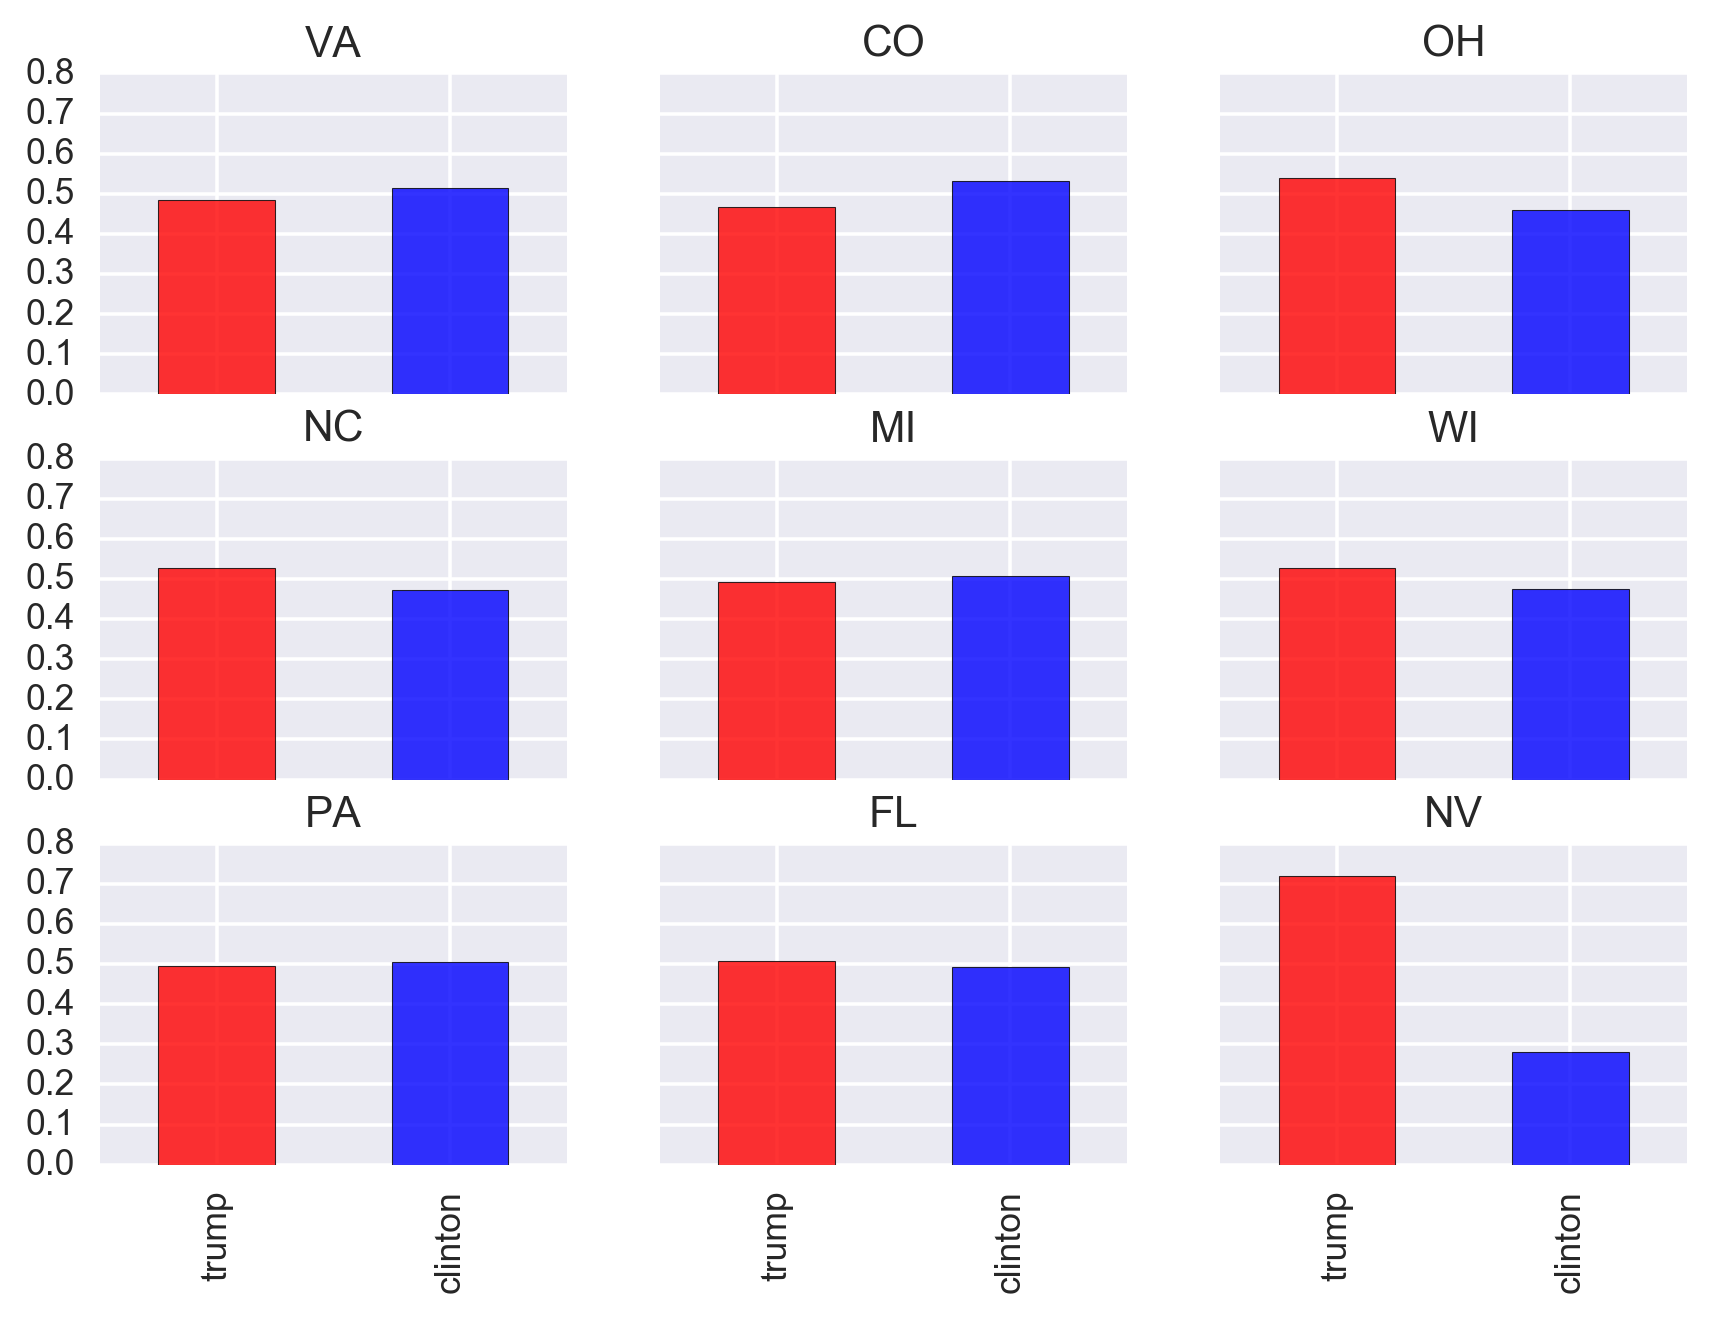

In [4]:
fg, axes = plt.subplots(3, 3, sharex=True, sharey=True)
for (state, df), ax in zip(dfs.items(), axes.reshape([9])):
    df['projection'].plot(kind='bar', color='rb', ax=ax, alpha=.8, title=state)